In [127]:
import wave
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [137]:
def print_wave_info(wf):
    """WAVEファイルの情報を取得"""
    print ("チャンネル数:", wf.getnchannels())
    print ("サンプル幅:", wf.getsampwidth())
    print ("サンプリング周波数:", wf.getframerate())
    print ("フレーム数:", wf.getnframes())
    print ("パラメータ:", wf.getparams())
    print ("長さ（秒）:", float(wf.getnframes()) / wf.getframerate())

In [140]:
# 音声データをmatplotlibに合わせるため加工する
def wave_normalization4matplot(filename):
    wf = wave.open(filename, "r") # 音声データはbits_per_sampleが16bitにしないと読み込まないよ
    print_wave_info(wf)
    fs = wf.getframerate()
    y = wf.readframes(wf.getnframes())
    y = np.frombuffer(y,  dtype='int16') / 32768.0 # y軸を(-1, 1)に正規化
    return y, float(fs)

In [141]:
def change_aspect_ratio(ax, ratio):
    aspect = (1/ratio) *(ax.get_xlim()[1] - ax.get_xlim()[0]) / (ax.get_ylim()[1] - ax.get_ylim()[0])
    ax.set_aspect(aspect)

チャンネル数: 1
サンプル幅: 2
サンプリング周波数: 22050
フレーム数: 61740
パラメータ: _wave_params(nchannels=1, sampwidth=2, framerate=22050, nframes=61740, comptype='NONE', compname='not compressed')
長さ（秒）: 2.8


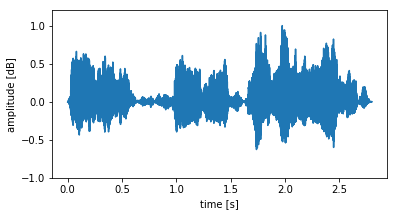

In [144]:
# defalt plot
filename = './yukari_1st/all_test_01_16.wav'
y, fs =wave_normalization4matplot(filename)
x = np.arange(0.0, len(y) / fs, 1/fs)
_, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel('time [s]')
ax.set_ylabel('amplitude [dB]')
ax.set_ylim([-1.0, 1.2])
change_aspect_ratio(ax, 2)
plt.savefig('./wav_plot_test')
plt.show()